In [2]:
# IMDB Dataset of 50K Movie Reviews

import pandas as pd 

df = pd.read_csv("/Users/patash/PSTB/Week_4/day_5_Mini_project/IMDB_Dataset.csv", sep=None, engine="python")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 1. Charger les données IMDB prétraitées: indice 1 - mot plus fréquent, indice 10000 - mot moins fréquent. 
num_words = 10000  
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)

print(x_train[:5]) 
print(y_train[:5]) 



[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
# 2. Convertir les séquences en matrices binaires (one-hot encoding)
def one_hot_encode(sequences, num_words):
    results = np.zeros((len(sequences), num_words))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1  # Mettre à 1 les indices des mots présents
    return results

x_train_bin = one_hot_encode(x_train, num_words)
x_test_bin = one_hot_encode(x_test, num_words)

print(x_train_bin[:5]) 

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [7]:
# 3. Diviser en train, validation et test
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_bin, y_train, test_size=0.2, random_state=42)

print(f"Taille des données : Train={x_train_final.shape}, Validation={x_val.shape}, Test={x_test_bin.shape}")

Taille des données : Train=(20000, 10000), Validation=(5000, 10000), Test=(25000, 10000)


In [8]:
#  Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop


model = Sequential()
model.add(Dense(64, input_dim=x_train_bin.shape[1], activation='relu'))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(),  
              loss='binary_crossentropy',  
              metrics=['accuracy'])  

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,177 (2.45 MB)

 Trainable params: 642,177 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training
history = model.fit(
    x_train_final, 
    y_train_final,  
    epochs=20, 
    batch_size=512, 
    validation_data=(x_val, y_val), 
    verbose=1  
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6855 - loss: 0.5687 - val_accuracy: 0.8784 - val_loss: 0.3192
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9016 - loss: 0.2768 - val_accuracy: 0.8834 - val_loss: 0.2804
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9180 - loss: 0.2202 - val_accuracy: 0.8474 - val_loss: 0.3829
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9311 - loss: 0.1820 - val_accuracy: 0.8856 - val_loss: 0.2826
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9510 - loss: 0.1412 - val_accuracy: 0.8808 - val_loss: 0.3021
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9575 - loss: 0.1194 - val_accuracy: 0.8666 - val_loss: 0.3475
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9684 - loss: 0.0991 - val_accuracy: 0.8774 - val_loss: 0.3403
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9742 - loss: 0.0827 - val_accuracy: 0.8476 - v

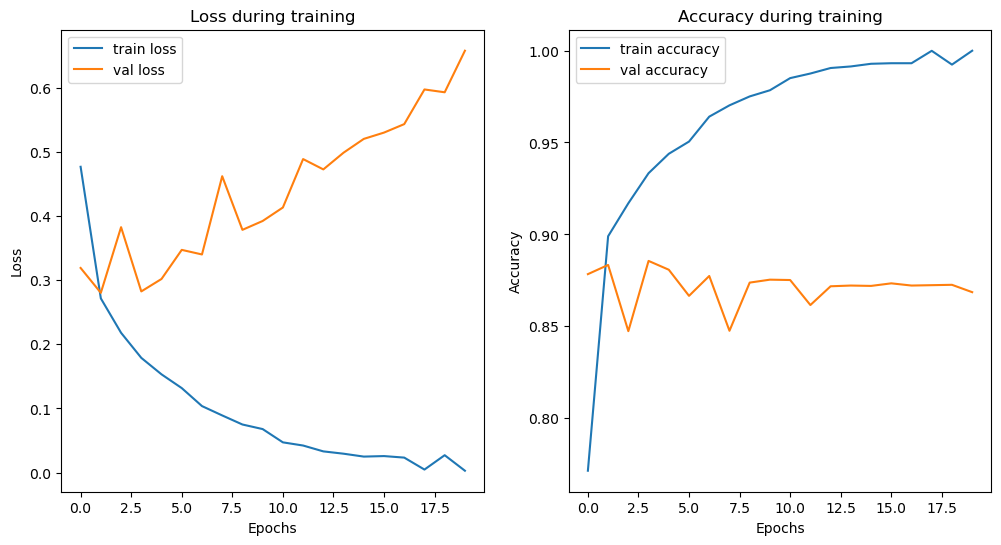

In [10]:
import matplotlib.pyplot as plt

# Tracer la perte (loss) pendant l'entraînement et la validation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer la précision (accuracy) pendant l'entraînement et la validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Créer un callback d'early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Retraining
history_optimized = model.fit(
    x_train_final, 
    y_train_final, 
    epochs=100,  # Un grand nombre d'époques pour permettre à early stopping de fonctionner
    batch_size=512, 
    validation_data=(x_val, y_val), 
    callbacks=[early_stopping],  
    verbose=1
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9860 - loss: 0.0380 - val_accuracy: 0.8724 - val_loss: 0.6441
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.8714 - val_loss: 0.6429
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8720 - val_loss: 0.6921
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.8712 - val_loss: 0.6730
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8714 - val_loss: 0.7172
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9985 - loss: 0.0055 - val_accuracy: 0.8710 - val_loss: 0.7087
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 9.4064e-04 - val_accuracy: 0.8714 - val_loss: 0.7454


In [12]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(x_test_bin, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8644 - loss: 0.6706
Test Loss: 0.669891893863678
Test Accuracy: 0.8650400042533875


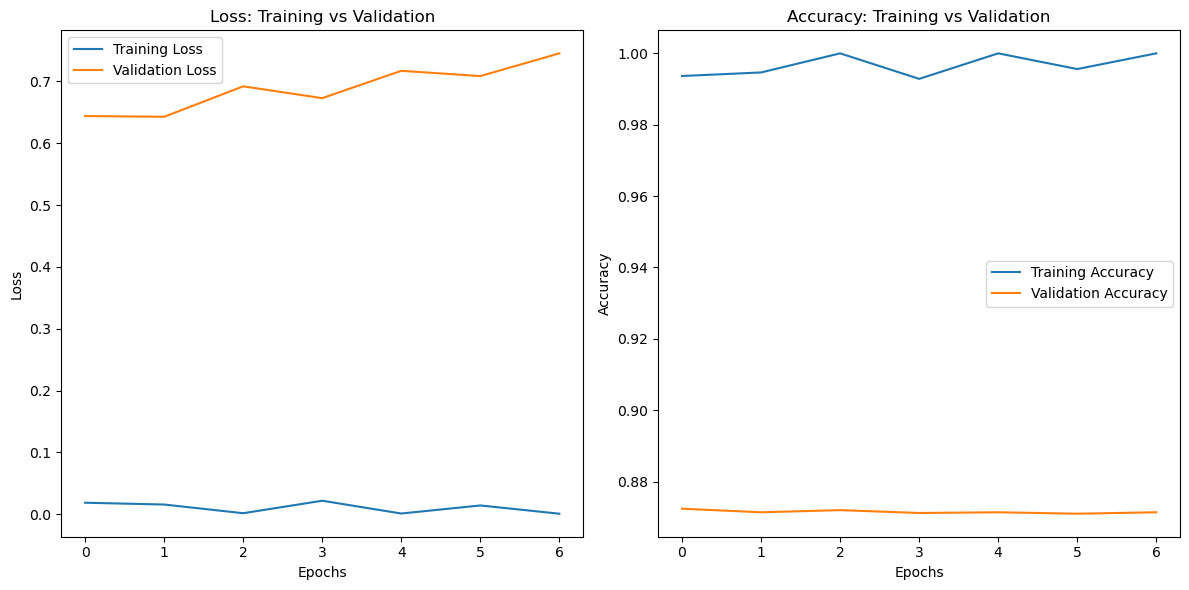

In [14]:
# Afficher les courbes de loss et accuracy après le retraining
plt.figure(figsize=(12, 6))

# Courbe de la perte (loss)
plt.subplot(1, 2, 1)
plt.plot(history_optimized.history['loss'], label='Training Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.title('Loss: Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de la précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy: Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()


In [ ]:
# Selon les graphiques Loss, Accuracy notre modéle reste supappris malgré le retraining. 
# Test Loss: 0.67, Test Accuracy: 0.86. 